### imports

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import ticker, cm
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from IPython.display import clear_output

from ipynb.fs.full.optimizedTIO_paper import refAccuracyScheduler

clear_output()

#### display 

In [2]:
import pandas as pd

In [30]:
title = 'paper_new_rlp_simplex_no_reg_n_500_d_100_r_0.5'
df = pd.read_csv(title+'.csv')
condition_str = str(np.format_float_scientific(df['condition'][0],3))
r_wish = df['r'][0]

In [31]:
balayage_delta = df['bar_delta'].unique()
balayage_N = df['N_ref'].unique()

In [32]:
colors_delta = ['tab:red','tab:purple','tab:orange','tab:brown']
styles = ["p","*","h","P"]

In [33]:
selected = df.groupby(['N_ref','bar_delta','r','schedule']).agg('mean')[['GAP','time','prox_iter']]

In [34]:
selected

GAP        time  prox_iter
N_ref bar_delta r   schedule                                 
100   0.00001   0.5 constant  0.001057    9.908250    16768.2
                    tunable   0.001057   10.088154    16809.3
      0.00100   0.5 constant  0.001143    1.946974     3260.0
                    tunable   0.001092    1.732280     2960.8
      0.10000   0.5 constant  0.023715    0.276427      411.6
                    tunable   0.009957    0.251606      373.8
500   0.00001   0.5 constant  0.000067   25.430319    49062.6
                    tunable   0.000067   20.696724    39386.1
      0.00100   0.5 constant  0.000171    8.813451    13868.8
                    tunable   0.000099    8.759831    13423.4
      0.10000   0.5 constant  0.015691    0.723640     1013.4
                    tunable   0.006415    0.591291      819.8
1000  0.00001   0.5 constant  0.000042   54.368260    90971.3
                    tunable   0.000042   46.068393    78510.0
      0.00100   0.5 constant  0.000113   13.900528    24372.1
                    tunable   0.000073   14.207561    24487.0
      0.10000   0.5 constant  0.007596    0.984906     1521.9
                    tunable   0.005555    0.770070     1146.2
5000  0.00001   0.5 constant  0.000028  331.065360   416278.0
                    tunable   0.000028  334.551077   390920.0
      0.00100   0.5 constant  0.000046   49.558489    62543.5
                    tunable   0.000039   39.419091    49318.8
      0.10000   0.5 constant  0.000880    3.192824     5528.6
                    tunable   0.000853    2.958336     5000.0

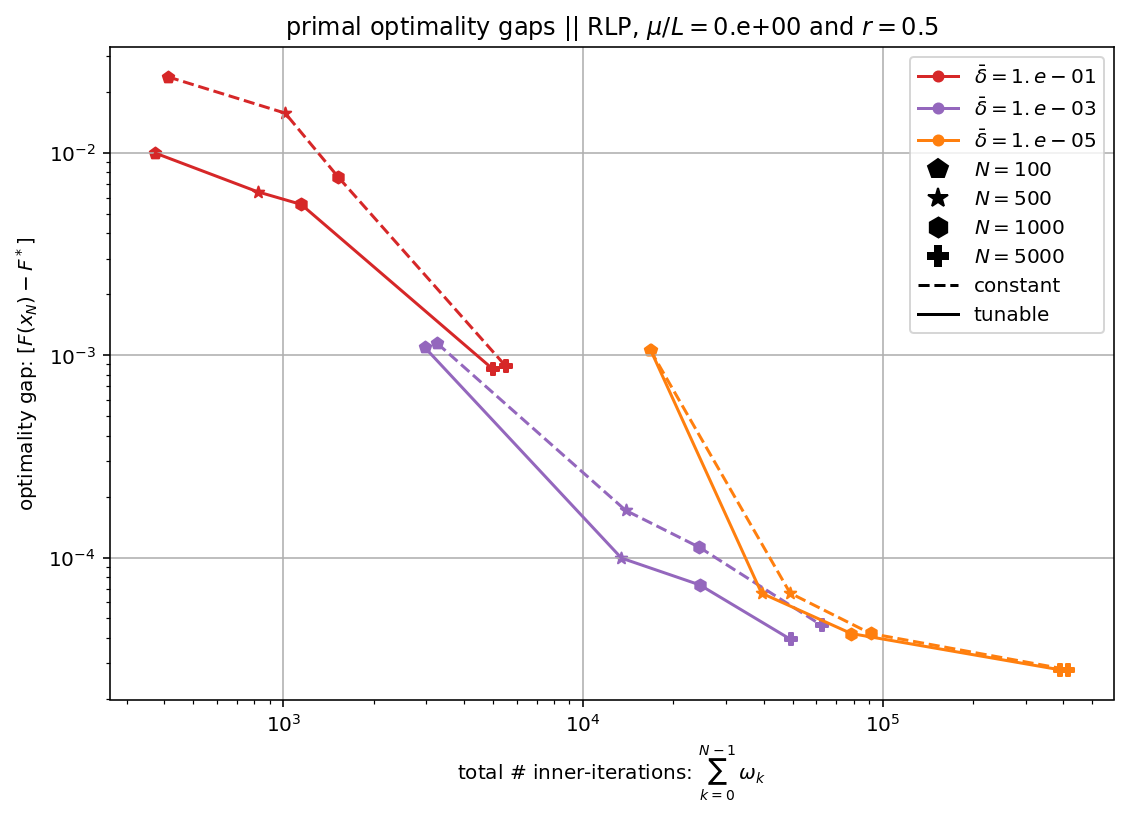

In [35]:
plt.figure(figsize=(9,6))
plt.title('primal optimality gaps || RLP, $\\mu / L = $'+condition_str+' and $r = $'+str(r_wish))

for col,delta_tested in zip(colors_delta[:len(balayage_delta)],balayage_delta):
    points_constant = []
    prox_constant = []
    points_tunable = []
    prox_tunable = []

    for sty,N_tested in zip(styles,balayage_N):
        prox_constant.append(selected.loc[(N_tested, delta_tested, r_wish, 'constant')]['prox_iter'])
        prox_tunable.append(selected.loc[(N_tested, delta_tested, r_wish, 'tunable')]['prox_iter'])
        points_tunable.append(selected.loc[(N_tested, delta_tested, r_wish, 'tunable')]['GAP'])
        points_constant.append(selected.loc[(N_tested, delta_tested, r_wish, 'constant')]['GAP'])
        
        plt.scatter(prox_constant[-1],points_constant[-1],color=col,marker=sty)
        plt.scatter(prox_tunable[-1],points_tunable[-1],color=col,marker=sty)

    
    plt.plot(prox_constant,points_constant,color=col,linestyle='--')
    plt.plot(prox_tunable,points_tunable,color=col)
    
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# from data
# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
if r_wish==0:
    
    del_low = Line2D([0], [0], label='$\\bar{\\delta} = 9.e-03$', marker=".", markersize=10,color=colors_delta[0])
    del_mid = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-04$', marker=".", markersize=10,color=colors_delta[1])
    del_acc = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-06$', marker=".", markersize=10,color=colors_delta[2])
else:
    del_low = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-01$', marker=".", markersize=10,color=colors_delta[0])
    del_mid = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-03$', marker=".", markersize=10,color=colors_delta[1])
    del_acc = Line2D([0], [0], label='$\\bar{\\delta} = 1.e-05$', marker=".", markersize=10,color=colors_delta[2])

line_constant = Line2D([0], [0], label='constant', color='k',linestyle='--')
line_tunable = Line2D([0], [0], label='tunable', color='k',linestyle='-')
point100 = Line2D([0], [0], label='$N=100$', marker="p", markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')
point500 = Line2D([0], [0], label='$N=500$', marker="*", markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')
point1000 = Line2D([0], [0], label='$N=1000$', marker="h", markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')
point5000 = Line2D([0], [0], label='$N=5000$', marker="P", markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')



# add manual symbols to auto legend
handles.extend([del_low,del_mid,del_acc,point100,point500,point1000,point5000,line_constant, line_tunable])

plt.legend(handles=handles)
plt.xlabel('total # inner-iterations: $\\sum_{k=0}^{N-1}\,\\omega_k$')
plt.ylabel('optimality gap: [$F(x_N)-F^*$]')
plt.yscale('log')
plt.xscale('log')
plt.grid()

plt.savefig('omega_'+title+'.pdf',dpi=600)